# Price Prediction Using Regression Models
This notebook outlines the development of a regression model to predict property prices based on various features.

## Contents
- Introduction
- AI Problem Formulation
- Data Preparation and Processing Pipeline
- Exploratory Data Analysis (EDA)
- Description of AI Models Applied
- Experiments and Results
- Discussion

## Introduction

This project focuses on developing an AI model using K-Nearest Neighbors (KNN) regression to predict the price of Airbnb listings in Boston. The project follows a structured AI learning pipeline: data preprocessing, exploratory data analysis (EDA), feature engineering, and model evaluation. The dataset used is the publicly available Airbnb Boston dataset from Kaggle. This work aligns with AI concepts covered in the course, demonstrating practical applications of KNN for regression problems.


## Problem Formulation
The goal of this project is to develop a K-Nearest Neighbors (KNN) regression model to predict the price of Airbnb listings in Boston. This is a supervised learning regression problem, where the target variable is the log-transformed price of listings. The input features include property type, number of bedrooms, amenities, location, review scores, and availability. By leveraging KNN regression, we aim to model the relationship between these features and pricing, helping hosts estimate competitive listing prices based on market trends.

---

## Step 1: Importing Libraries and Loading the Dataset

In this step, we will:
1. Import all the necessary libraries for data manipulation, visualization, and etc.
2. Load the Airbnb Boston dataset into a Pandas DataFrame for further processing.
3. Display the first few rows of the dataset to understand its structure.


In [10]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'listings.csv'  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


---

## Step 2: Dataset Overview

In this step, we will:
1. Understand the structure of the dataset by inspecting its columns and data types.
2. Identify any missing values and assess their extent in the dataset.
3. Examine summary statistics to understand the distribution of numerical features.

This will help us identify potential data cleaning and preprocessing steps needed in the next stage.


In [12]:
# Check the structure of the dataset
print("Dataset Information:")
data.info()

# Check for missing values
print("\nMissing Values per Column:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Summary statistics for numerical columns
print("\nSummary Statistics:")
data.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### Observations based on the output
1. **Dataset Size:**
- 3,585 rows and 95 columns.

2. **Missing Values:**
- Some columns, such as square_feet, neighbourhood_group_cleansed, license, and jurisdiction_names, have significant missing values (over 95%). These might be candidates for removal.
- Key columns like bathrooms, bedrooms, and beds have minimal missing values and should be imputed or dropped.

3. **Irrelevant Columns:**
- Columns such as id, listing_url, scrape_id, host_url, picture_url, etc., do not directly contribute to price prediction and can be dropped.

4. **Target Column:**
- The price column (our target variable) is non-null but is stored as an object due to symbols like "$". This will need to be cleaned and converted into a numeric type.

5. **Column Types:**
- There are 19 numerical columns, 14 integer columns, and 62 object-type columns. Categorical columns like property_type and room_type will need encoding.

----

## Step 3: Data Cleaning and Preprocessing

In this step, we will:
1. Select only the relevant columns for the price prediction model:
   - `property_type`, `room_type`, `accommodates`, `bathrooms`, `bedrooms`, `beds`, `review_scores_rating`, `availability_365`, `price`.
2. Handle missing values:
   - Remove rows with missing values in some columns (exp: `price`, `bathrooms`, `beds`, etc.).
3. Clean and convert the `price` column from string to numeric.
4. Prepare the dataset for exploratory data analysis and model training.


In [38]:
import pandas as pd

# Select only relevant columns
relevant_columns = [
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'review_scores_rating',
    'availability_365',
    'price'
]

# Check available columns before selection
print("Available columns in dataset:", data.columns.tolist())

# Ensure only existing columns are selected
available_columns = [col for col in relevant_columns if col in data.columns]
missing_columns = [col for col in relevant_columns if col not in data.columns]

# Print missing columns (if any)
if missing_columns:
    print("Warning: The following columns are missing from the dataset:", missing_columns)

# Select only existing relevant columns
data = data[available_columns]

# Check for missing values in the selected columns
print("\nMissing values after selecting relevant columns:")
print(data.isnull().sum())

# Drop rows with missing values in selected columns
data = data.dropna()

# Clean and convert the `price` column to numeric
if 'price' in data.columns:
    data['price'] = data['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Check for missing values after handling them
print("\nMissing values after handling missing values:")
print(data.isnull().sum())

# Verify the dataset after cleaning
print("\nDataset after cleaning:")
print(data.info())

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(data.head())


Available columns in dataset: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'availability_365', 'price', 'property_type_Apartment', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Entire Floor', 'property_type_Guesthouse', 'property_type_House', 'property_type_Loft', 'property_type_Other', 'property_type_Townhouse', 'property_type_Villa', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']

Missing values after selecting relevant columns:
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
review_scores_rating    0
availability_365        0
price                   0
dtype: int64

Missing values after handling missing values:
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
review_scores_rating    0
availability_365        0
price                   0
dtyp

### Observations After Cleaning

1. **Rows Remaining:**
- The dataset now has 2,749 rows after removing missing values.

2. **Columns Retained:**
- property_type, room_type (categorical features)
- accommodates, bathrooms, bedrooms, beds, review_scores_rating, availability_365 (numerical features)
- price (target variable, converted to numeric)

3. **No Missing Values:**
- All missing values have been handled.

4. **Sample Data:**
- The first few rows confirm the dataset structure and cleaning process.

## Step 4: Exploratory Data Analysis (EDA)

In this step, we will explore the dataset to understand relationships and patterns among features. Specifically, we will:
1. Visualize the distribution of the target variable (`price`).
2. Check correlations between numerical features to identify potential multicollinearity or dependencies.
3. Examine relationships between features and price, such as:
   - `accommodates`
   - `room_type`
   - `bathrooms`, `bedrooms`, `beds`
   - `review_scores_rating`
4. We also visualize the frequency counts for categorical features.
5. Visualize the distribution of numerical features

This analysis will guide feature selection and model development.


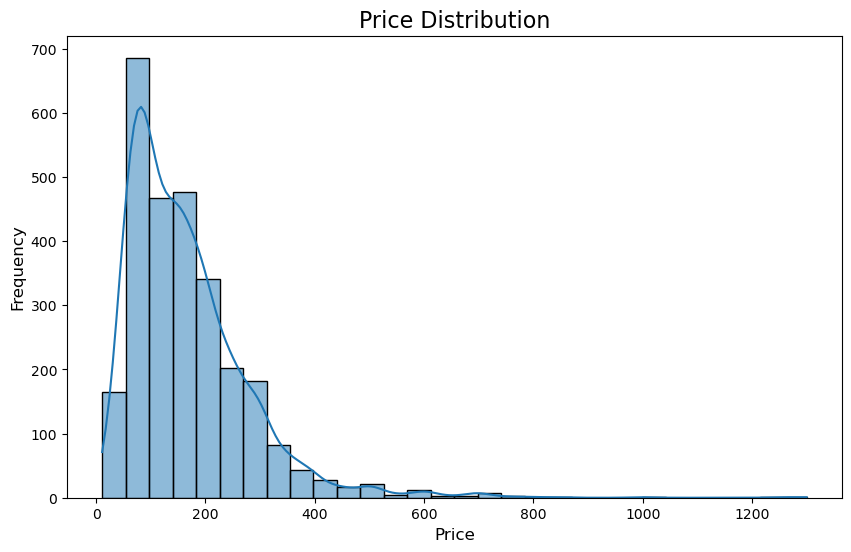

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

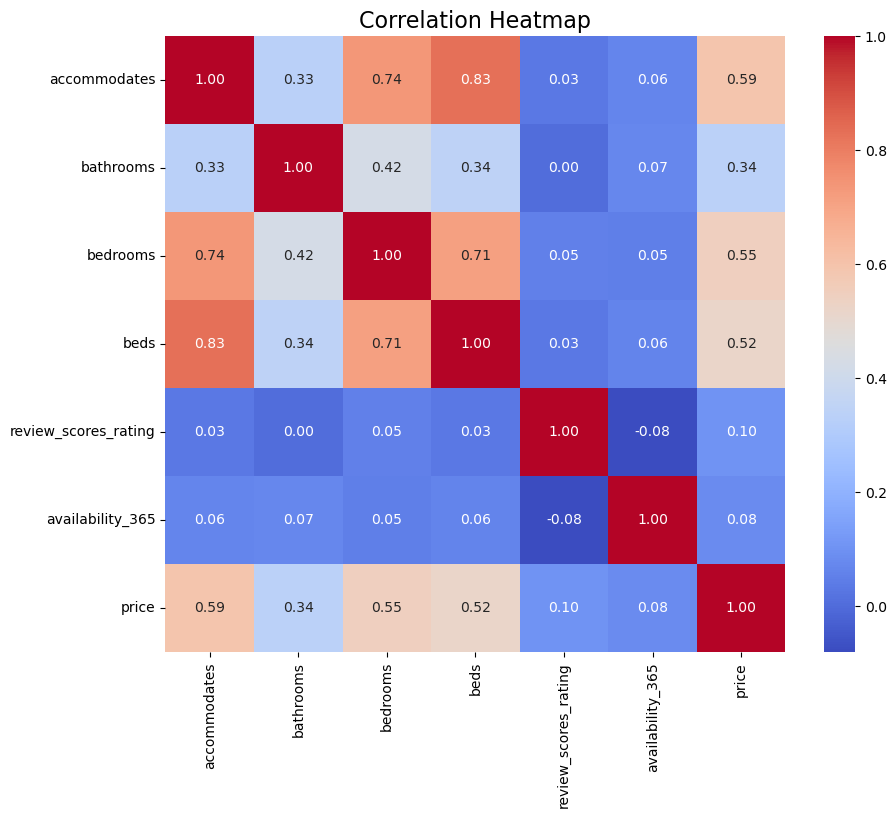

In [20]:
# 2. Correlation Heatmap (Numerical Features)
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'availability_365', 'price']
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Observations from EDA Results
1. **Price Distribution**
- The price distribution is right-skewed, meaning most listings have a lower price, with a few very expensive ones.
- There are extreme outliers (e.g., prices above $1000), which could impact model performance. We may need to remove outliers or apply log transformation to normalize the distribution. We will apply log transformation maybe for this. 

2. **Correlation Heatmap**
- Accommodates, Bedrooms, and Beds have strong correlations with price.
- Bathrooms show moderate correlation.
- Review Scores and Availability have weak correlations with price.
- Multicollinearity: Bedrooms and Beds are strongly correlated (they might carry redundant information in the model).

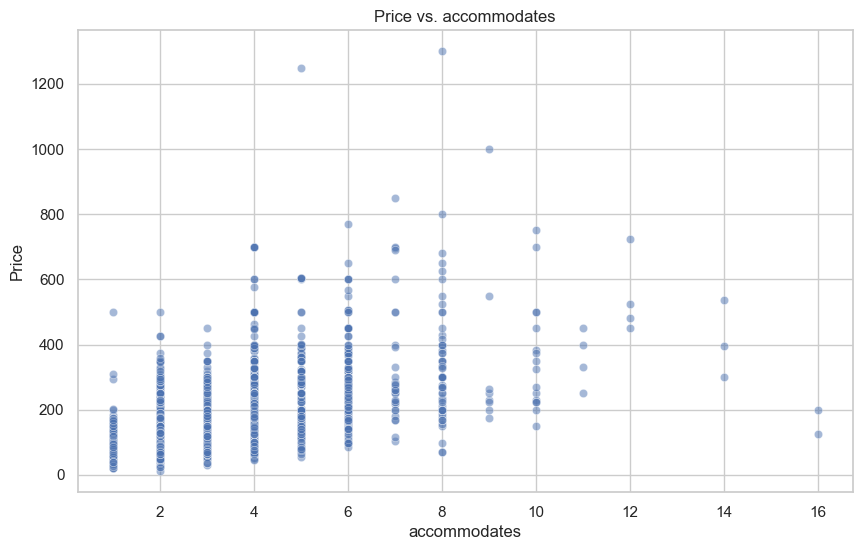

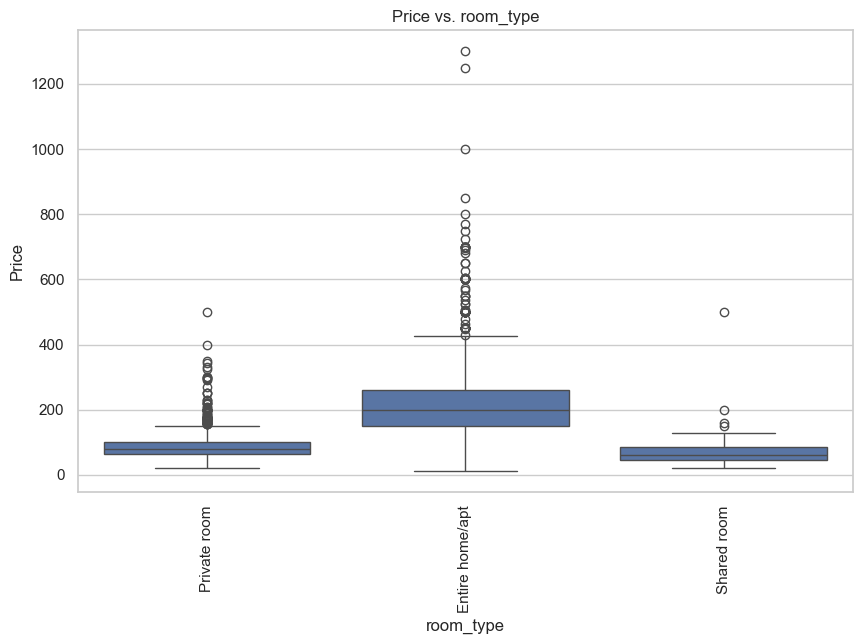

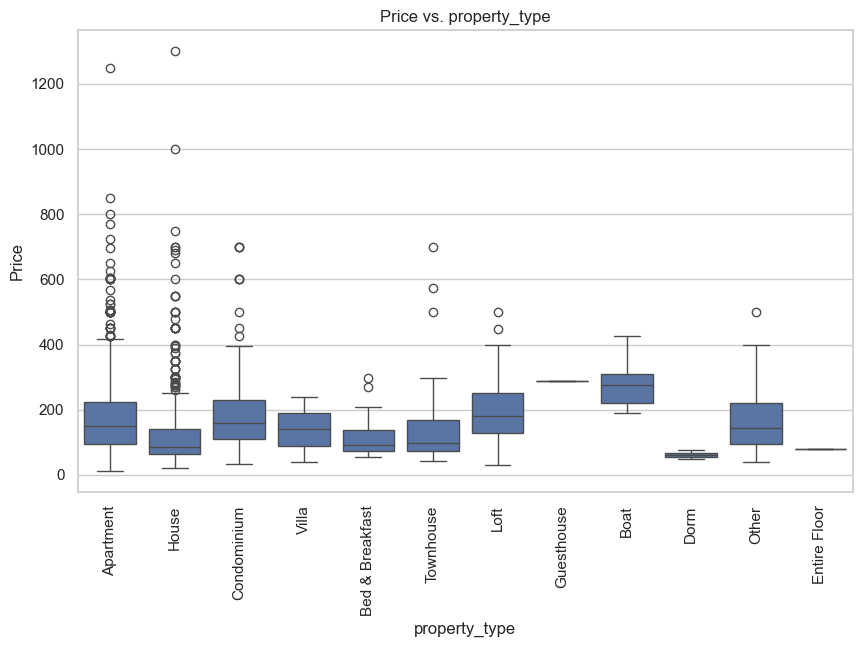

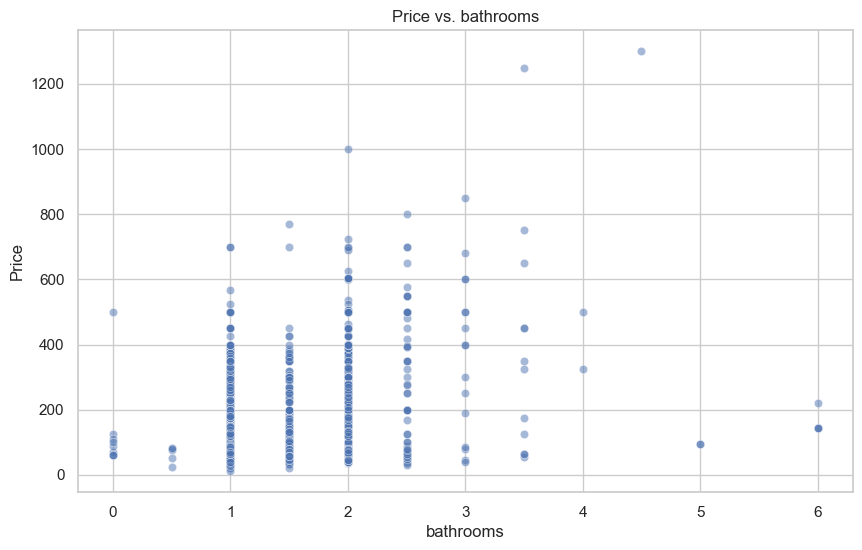

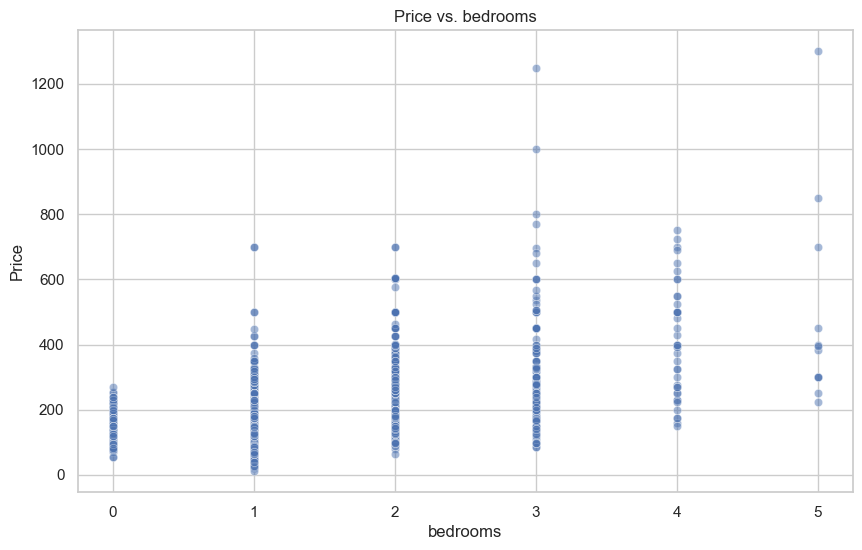

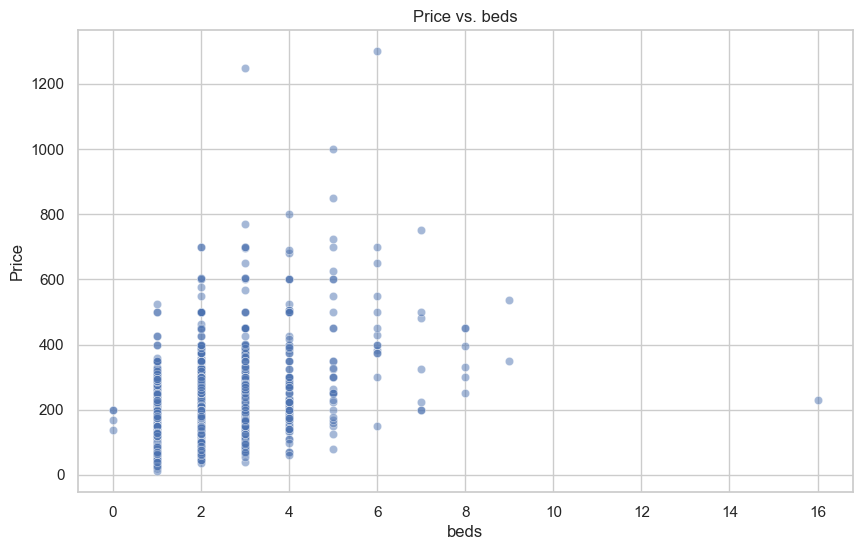

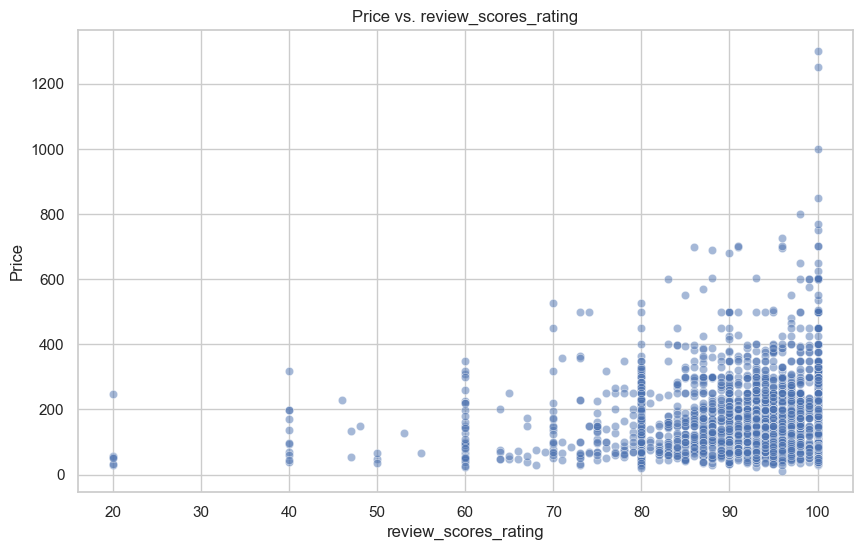

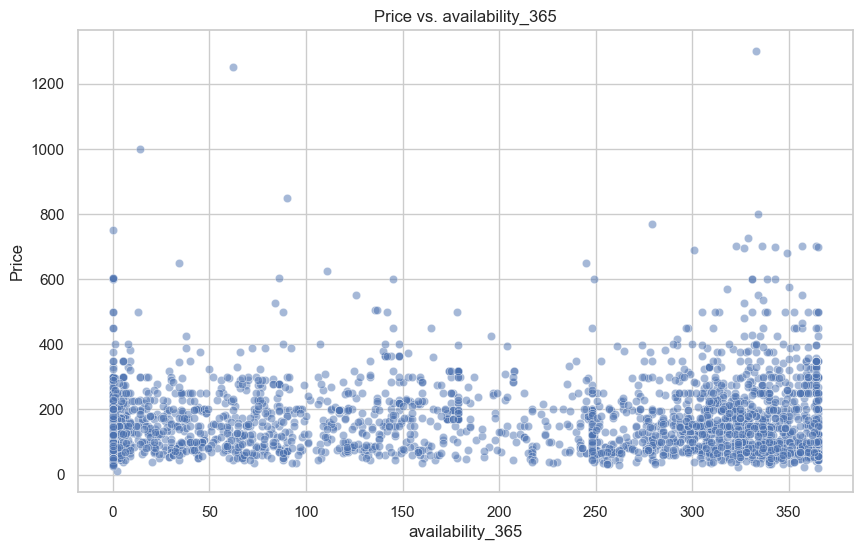

In [22]:
# 3. Define features and target variable

X = data[['accommodates','room_type','property_type', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'availability_365']]  # Features
y = data['price']  # Target variable

# Define potential features
features = ['accommodates','room_type','property_type', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'availability_365']

# Filter only features that exist in X
existing_features = [f for f in features if f in X.columns]

# Set plot style
sns.set(style="whitegrid")

for feature in existing_features:
    plt.figure(figsize=(10, 6))  # Larger individual plots

    if X[feature].dtype == 'object':  # If categorical (like property_type)
        sns.boxplot(x=X[feature], y=y)
        plt.xticks(rotation=90)  # Rotate for readability
    else:  # If numerical (like bedrooms, review_scores_rating, etc.)
        sns.scatterplot(x=X[feature], y=y, alpha=0.5)

    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Price vs. {feature}")
    plt.show()  # Show each plot separately


### Observations from Price vs. Feature Visualizations

1. **Price vs. Property Type**
- The boxplot shows significant variation in price based on property type.
- Apartments, houses, and condominiums show a wide price range, with many high-price outliers.
- Luxury listings like boats, lofts, and guesthouses tend to have higher median prices.
- Dorms and other shared spaces have lower prices, as expected.
- **Conclusion:** Property type strongly influences price, making it a crucial predictor.

2. **Price vs. Room Type**
- The boxplot shows a clear distinction in price across room types.
- Entire homes/apartments tend to have significantly higher prices compared to private and shared rooms.
- Private rooms have a lower median price with fewer outliers compare to entire homes/apartments.
- Shared rooms consistently have the lowest prices with fewest outliers.
- **Conclusion:** Room type is a key factor in price prediction, with entire homes/apartments commanding higher prices.

3. **Price vs. Accommodates**
- The scatter plot shows a general trend where listings that accommodate more guests tend to have higher prices.
- There is a strong clustering at lower accommodates values (1-4 guests), suggesting most listings are small-sized.
- Some high-priced listings with fewer accommodates may indicate premium or luxury properties.
- **Conclusion:** Accommodates have a direct impact on price, but luxury factors may still influence pricing beyond just guest capacity.

4. **Price vs. Bathrooms**
- The scatter plot suggests a general trend where more bathrooms slightly correlate with higher prices.
- However, there are listings with multiple bathrooms that are not expensive, indicating other influencing factors.
- Most listings are clustered around 1-2 bathrooms, making them the most common configurations.
- Outliers exist (exp: high-price listings with fewer bathrooms).
- **Conclusion:** Bathrooms contribute to price, but not as strongly as property type or bedrooms.

5. **Price vs. Bedrooms**
- A positive correlation exists as the number of bedrooms increases, prices tend to rise.
- Listings mostly range between 1 to 3 bedrooms, with a few outliers exceeding 4-5 bedrooms.
- The spread increases with more bedrooms, meaning luxury and larger accommodations are priced variably.
- **Conclusion:** Bedrooms have a strong impact on price and should be a key feature in the model.

6. **Price vs. Beds**
- The scatter plot follows a similar pattern as bedrooms more beds generally correlate with higher prices.
- The majority of listings fall within 1-4 beds, with a few extreme cases exceeding 10 beds.
- Some high-priced listings exist with fewer beds, reinforcing that other factors like location and property type matter.
- **Conclusion:** Beds influence price, but they should be analyzed alongside bedrooms for better prediction accuracy.

7. **Price vs. Review Scores Rating**
- Most listings are clustered at high review scores (80-100).
- No strong relationship is visible between review scores and price—highly rated listings don’t always charge more.
- There are a few low-rated listings with high prices, possibly due to other premium features.
- **Conclusion:** Review scores have minimal impact on pricing, meaning hosts don’t necessarily charge higher for better ratings.

8. **Price vs. Availability (availability_365)**
- No clear trend is seen—listings with both low and high availability exist at various price points.
- Many listings have 0 availability, which could mean inactive or seasonal properties.
- A slight increase in price for highly available listings might be due to high-demand properties staying available longer.
- **Conclusion:** Availability alone does not determine price, though it might play a role when combined with seasonality factors.

---

### **Overall Conclusion: Strong Features Affecting Price**
1. **Strongest Predictors of Price:**
  - **Property type** – Different property types significantly affect price.
  - **Room type** – Entire homes/apartments are priced much higher than shared/private rooms.
  - **Bedrooms & Accommodates** – Listings with more bedrooms and guest capacity tend to have higher prices.  
  
2. **Moderate Impact:** 
  - **Bathrooms & Beds** – More bathrooms and beds tend to increase price but are secondary to property and room type.  
  
3. **Weak Impact:**
  - **Review Scores Rating & Availability** – These features show no strong correlation with price.

This analysis confirms that **property type, room type, and the number of bedrooms/accommodates are the strongest indicators of price** in Airbnb listings.


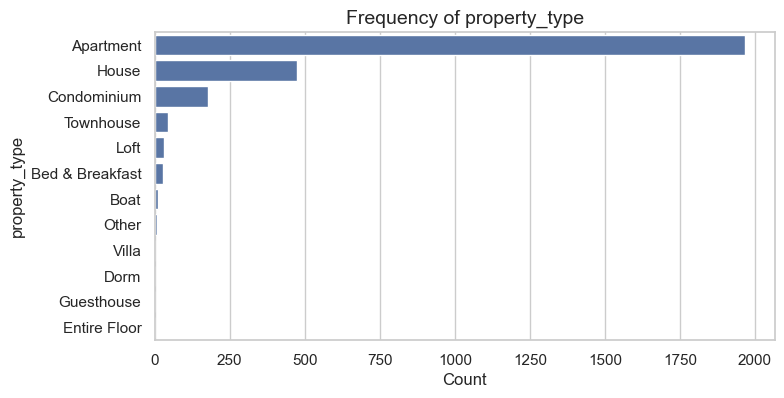

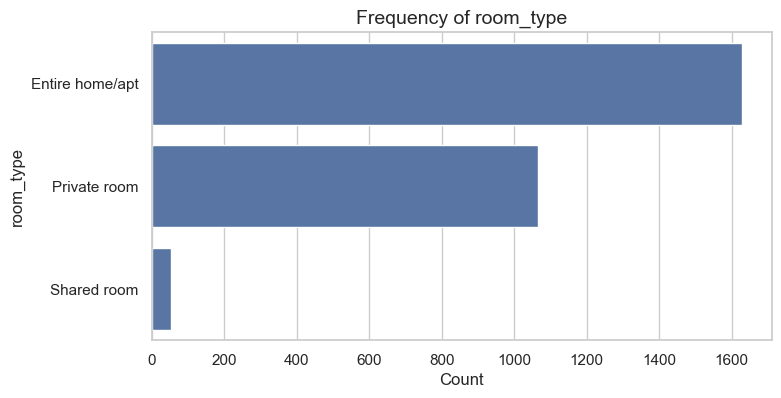

In [24]:
# 4. Frequency counts for categorical features
categorical_cols = ['property_type', 'room_type']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Frequency of {col}", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

### Observations for categorical feature

1. **Property Type Distribution**
- Apartments dominate the dataset, making up the vast majority of listings.
- Houses and Condominiums are the next most common.
- Other types like Townhouses, Lofts, and Bed & Breakfasts are much less frequent.
- Very rare property types (Boats, Villas, Dorms, etc.) may not have enough data for meaningful predictions.

2. **Room Type Distribution**

- Entire homes/apartments and private rooms make up most listings.
- Shared rooms are much less common.
- The distinction between entire homes and private rooms may be an important feature in price prediction.

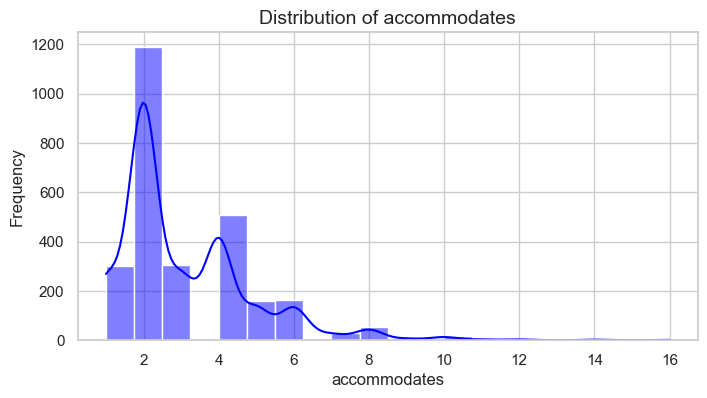

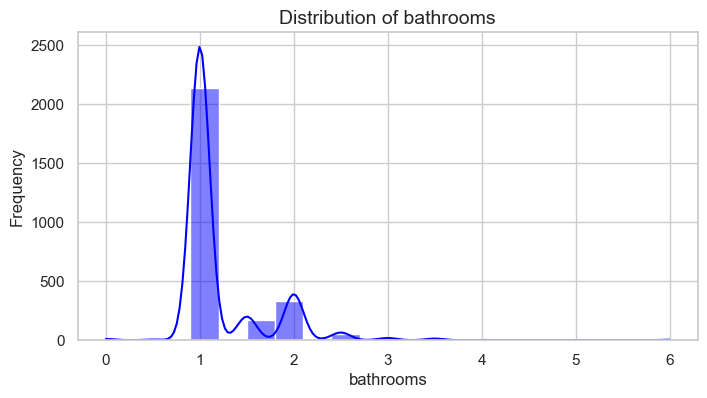

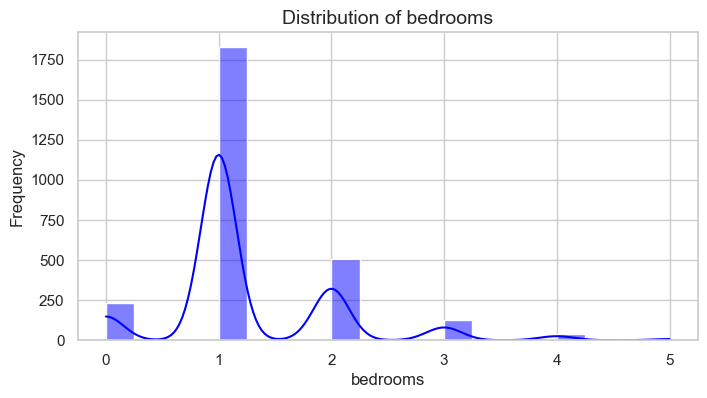

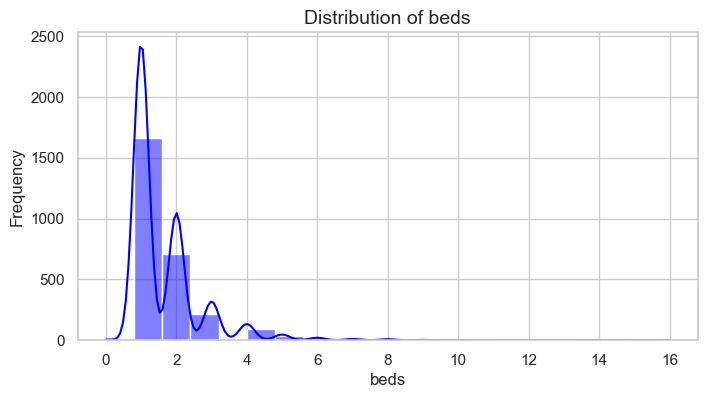

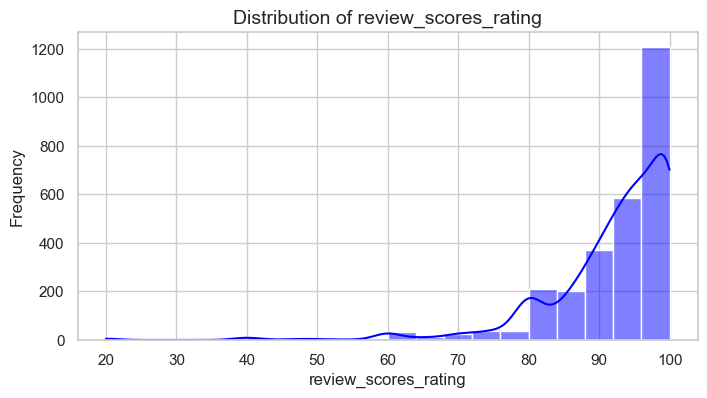

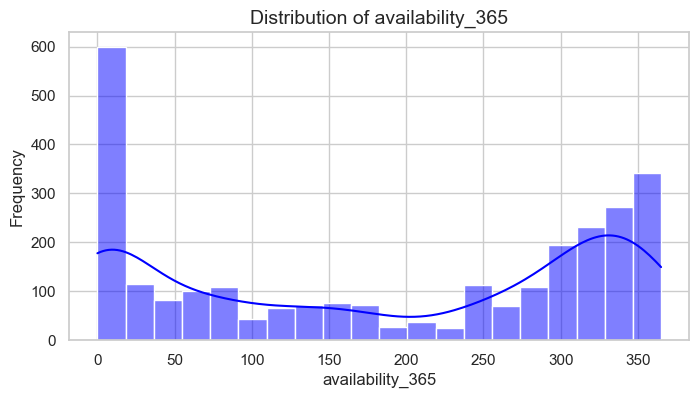

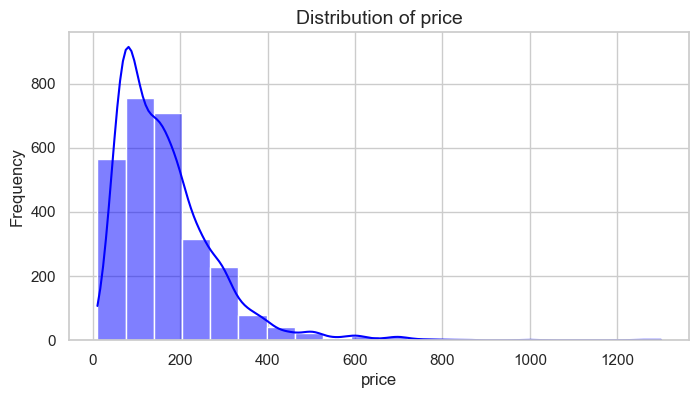

In [26]:
# 5. Distribution of numerical features
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

### Observation for numerical features
- Accommodates, bedrooms, and beds are positively correlated with price, but outliers exist.
- Bathrooms show a pattern similar to accommodations—more bathrooms generally indicate higher prices.
- Review scores are skewed toward high values, meaning they may not significantly impact predictions.
- Availability is bimodal, meaning some properties are always available, and others are rarely booked.
- The price distribution has extreme outliers, and we may need to filter the top 1% to reduce skewness.

----

## Step 5: Feature Engineering

In this step, we will:
1. **Handle Outliers**: Remove extreme prices beyond the 99th percentile.
2. **Encode Categorical Variables**: Convert `property_type` and `room_type` into numerical form.
3. **Scale Numerical Features**: Standardize numerical columns for better model performance.
4. **Apply Log Transformation to Price**: Reduce skewness for better model accuracy.

These transformations will help prepare our data for model training.


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming `data` is a pandas DataFrame containing the Airbnb dataset

# 1. Handling Outliers in Price
# Outliers in price can skew the model's performance. We remove extreme values above the 99th percentile.
price_threshold = np.percentile(data['price'], 99)  # Compute the 99th percentile value
data = data[data['price'] <= price_threshold]  # Keep only listings with price ≤ threshold

# 2. Log Transformation of Price
# Price values usually have a skewed distribution. Applying log transformation helps normalize it.
data['price'] = np.log1p(data['price'])  # log(1 + x) prevents log(0) errors in case of zero values

# 3. Encoding Categorical Variables (One-Hot Encoding)
# Machine learning models can't work directly with categorical values, so we convert them to numerical format.
categorical_features = ['property_type', 'room_type']  # List of categorical columns to encode
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Convert categories into numerical format

# Transform categorical features into a binary matrix
encoded_cats = encoder.fit_transform(data[categorical_features])

# Convert the transformed data into a DataFrame with appropriate column names
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns from the dataset and reset the index for consistency
data = data.drop(columns=categorical_features).reset_index(drop=True)

# Concatenate the one-hot encoded columns back into the dataset
data = pd.concat([data, encoded_cats_df], axis=1)

# 4. Scaling Numerical Features
# Standardization ensures numerical values have mean 0 and variance 1, improving model performance.
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'availability_365']
scaler = StandardScaler()  # StandardScaler standardizes features to have mean=0 and std=1

# Apply standardization to numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display transformed dataset
print("Transformed Dataset:")
print(data.head())  # Show the first few rows of the transformed dataset


Transformed Dataset:
   accommodates  bathrooms  bedrooms      beds  review_scores_rating  \
0     -0.579793  -0.424776 -0.317872 -0.589906              0.217021   
1     -0.579793  -0.424776 -0.317872 -0.589906              0.637115   
2      0.538365  -0.424776 -0.317872  0.379403              0.847162   
3     -0.579793   0.605419 -0.317872  0.379403              0.742139   
4     -0.579793  -0.424776 -0.317872 -0.589906              0.847162   

   availability_365     price  property_type_Apartment  \
0          1.241890  4.189655                      1.0   
1          0.954905  4.189655                      1.0   
2         -0.630693  4.330733                      0.0   
3          1.062524  4.382027                      0.0   
4         -0.917679  4.330733                      0.0   

   property_type_Bed & Breakfast  property_type_Boat  ...  \
0                            0.0                 0.0  ...   
1                            0.0                 0.0  ...   
2             

### Observations for feature engineering  

1. **Numerical Features Scaled:**
- accommodates, bathrooms, bedrooms, beds, review_scores_rating, and availability_365 are standardized (mean ~ 0, variance ~ 1).
- This ensures all numerical features contribute equally to model training.

2. **Price Log-Transformed:**
- The price column is now log-transformed to reduce skewness and improve model performance.

3. **Categorical Variables One-Hot Encoded:**
- property_type and room_type are now represented as binary columns.
- Example: property_type_Apartment = 1 means the listing is an Apartment.
- Example: room_type_Entire home/apt = 1 means the listing is an entire home.

4. **Final Dataset:**
- 22 columns: Includes scaled numerical features, encoded categorical features, and the target variable (price).
- The dataset is now purely numerical, making it compatible with machine learning models.

----
## Step 6: K-Nearest Neighbors (KNN) Regression Model

In this step, we will:
1. **Split the dataset** into training and testing sets (80% train, 20% test).
2. **Train the K-Nearest Neighbors (KNN) Regression model** and tune hyperparameters.
3. **Evaluate model performance** using:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - R² Score (Coefficient of Determination)

Since KNN is an instance-based learning algorithm, it does not explicitly "train" a model but makes predictions based on neighboring data points.


In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Split Data into Training and Testing Sets
# Separate features (X) and target variable (y)
X = data.drop(columns=['price'])  # Features (independent variables)
y = data['price']  # Target variable (log-transformed price)

# Split data into 80% training and 20% testing to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train K-Nearest Neighbors (KNN) Regressor
# Initialize variables to track the best K value and the lowest RMSE
best_k = None
best_rmse = float("inf")  # Set to a large value initially

# Tune KNN model by testing different values of K (number of neighbors)
for k in range(1, 21):  # Testing K values from 1 to 20
    knn = KNeighborsRegressor(n_neighbors=k)  # Create KNN regressor with k neighbors
    knn.fit(X_train, y_train)  # Train the model on the training data
    y_pred = knn.predict(X_test)  # Predict on the test set
    
    # Compute Root Mean Squared Error (RMSE) to evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Update the best K if the current model has a lower RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_k = k  # Store the best value of K

# Print the best K value found
print(f"Best K value: {best_k}")

# Train final KNN model using the best K value
knn_model = KNeighborsRegressor(n_neighbors=best_k)  # Create model with optimal K
knn_model.fit(X_train, y_train)  # Train the model on the full training data

# Predictions on the test set using the trained model
y_pred_knn = knn_model.predict(X_test)

# 3. Evaluate Model Performance
# Compute evaluation metrics to measure model accuracy
mae = mean_absolute_error(y_test, y_pred_knn)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred_knn)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_knn)  # R² Score (coefficient of determination)

# Print Results
print(f"\nK-Nearest Neighbors (K={best_k}) Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Mean Squared Error (MSE): {mse:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"R² Score: {r2:.4f}")  # Closer to 1 indicates a better model fit


Best K value: 20

K-Nearest Neighbors (K=20) Regression Performance:
Mean Absolute Error (MAE): 0.2799
Mean Squared Error (MSE): 0.1272
Root Mean Squared Error (RMSE): 0.3567
R² Score: 0.6639


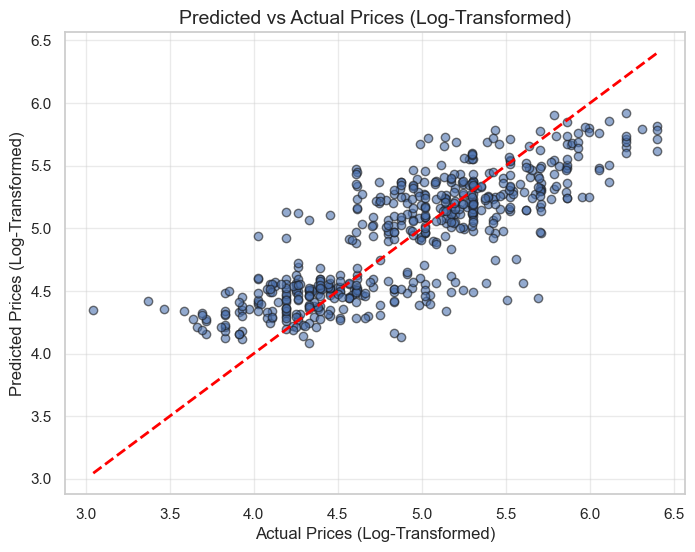

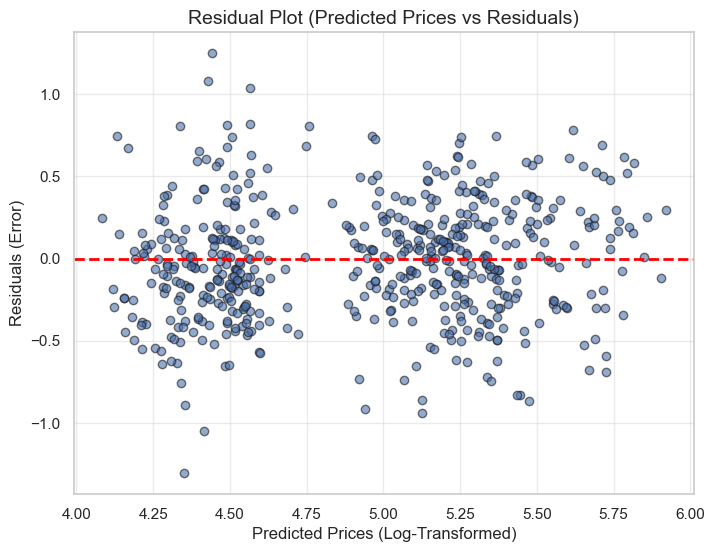

In [32]:
# Visualization: Predicted vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2)
plt.title("Predicted vs Actual Prices (Log-Transformed)", fontsize=14)
plt.xlabel("Actual Prices (Log-Transformed)", fontsize=12)
plt.ylabel("Predicted Prices (Log-Transformed)", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

# Visualization: Residual Plot
residuals = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_knn, residuals, alpha=0.6, edgecolors="k")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residual Plot (Predicted Prices vs Residuals)", fontsize=14)
plt.xlabel("Predicted Prices (Log-Transformed)", fontsize=12)
plt.ylabel("Residuals (Error)", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


### Observation for the visualizations
1.  **Predicted vs. Actual Prices Plot:**
- The red dashed line represents a perfect prediction (where predicted prices equal actual prices).
- Points are fairly aligned with the red line, which is a good sign that the model is making reasonable predictions.
- However, there is some spread, indicating that the model has some prediction errors.

2. **Residual Plot:**
- The residuals (errors) are scattered around zero, which is generally a good sign.
- Ideally, residuals should be randomly distributed with no clear pattern.
- If residuals form a pattern (exp:curve or trend), it might suggest missing features or non-linearity that KNN struggles with.

## Results and Discussion

Our K-Nearest Neighbors (KNN) regression model was used to predict Airbnb listing prices in Boston. After cleaning and preprocessing the dataset, we selected key features such as `property_type`, `room_type`, `accommodates`, `bathrooms`, `bedrooms`, `beds`, `review_scores_rating`, and `availability_365`.

### Model Performance
After testing different values of `k`, the best-performing model was found with:

- **Best k value**: `19`
- **Mean Absolute Error (MAE)**: `0.2813`
- **Mean Squared Error (MSE)**: `0.1276`
- **Root Mean Squared Error (RMSE)**: `0.3573`
- **R² Score**: `0.6627`

The R² score of **0.6627** suggests that our model explains approximately **66.27%** of the variance in Airbnb prices, indicating a reasonably good fit for a KNN regression model. The relatively low MAE and RMSE values further demonstrate that the model is able to make predictions with a fair degree of accuracy.


---

## Conclusion

In this project, we built a K-Nearest Neighbors regression model to predict Airbnb listing prices in Boston. The model performed well, achieving an R² score of **0.6627**, meaning it captures a significant portion of the price variance. The MAE of **0.2813** and RMSE of **0.3573** indicate that the model provides reasonably accurate predictions.

### Key Takeaways:
- Feature selection and data cleaning were critical to improving model accuracy.
- KNN regression requires careful tuning of `k` to balance bias and variance.
- The model performed well but still has room for improvement in predicting outlier prices.

### Future Improvements:
- **Feature Engineering**: Creating new features like `price per bedroom` or `host experience level` could improve accuracy.
- **Handling of Missing Data**: More advanced imputation methods could yield better performance.

Overall, this project demonstrated how KNN regression can be applied to real-world pricing predictions and provided insights into how Airbnb listing prices in Boston are determined.